In [1]:
!pip install lightgbm

In [26]:
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix

In [27]:
df=pd.read_csv('C:\\Users\\82102\\Desktop\\HM\\그냥\\공모전\\DB 금융경제 공모전\\final.csv',encoding='euc-kr')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114165 entries, 0 to 114164
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   연령별                    114165 non-null  int64  
 1   직업구분                   114165 non-null  int64  
 2   분위구분                   114165 non-null  int64  
 3   평균소득                   95850 non-null   float64
 4   중위소득                   95850 non-null   float64
 5   평균처분가능소득               95850 non-null   float64
 6   중위처분가능소득               95850 non-null   float64
 7   소득분위배율                 94734 non-null   float64
 8   소득점유율                  95850 non-null   float64
 9   소득산출인구수                114165 non-null  int64  
 10  소득미산출인구수               114165 non-null  int64  
 11  소득미산출인구포함평균소득          95850 non-null   float64
 12  최근12개월신용및체크카드이용금액합계    95921 non-null   float64
 13  최근12개월전체체크카드이용금액합계     95550 non-null   float64
 14  최근12개월해외이용금액합계         87815 non-nul

In [29]:
df[10:30]

,연령별,직업구분,분위구분,평균소득,중위소득,평균처분가능소득,중위처분가능소득,소득분위배율,소득점유율,소득산출인구수,소득미산출인구수,소득미산출인구포함평균소득,최근12개월신용및체크카드이용금액합계,최근12개월전체체크카드이용금액합계,최근12개월해외이용금액합계,최근12개월평균신용및체크카드이용금액합계,최근12개월평균체크카드이용금액,최근12개월평균해외이용금액,최근12개월평균해외이용금액.1
10,0,0,0,3113.0,2600.0,2515.0,2200.0,225.9,100.0,23654,24925,2954.0,3.008738e+08,6.787143e+07,3241260.0,13858.0,4280.0,1004.0,1004.0
11,0,0,0,2664.0,2400.0,2297.0,2184.0,191.8,100.0,21772,22658,2560.0,2.385087e+08,5.282034e+07,1905119.0,12137.0,3762.0,618.0,618.0
12,0,0,0,2781.0,2500.0,2242.0,2096.0,197.7,100.0,281741,296457,2643.0,3.528732e+09,8.664580e+08,39162370.0,13503.0,4367.0,935.0,935.0
13,0,0,0,2965.0,2500.0,2328.0,2100.0,210.5,100.0,143930,151640,2814.0,1.889909e+09,4.729001e+08,22974198.0,14167.0,4621.0,1097.0,1097.0
14,0,0,0,2590.0,2400.0,2152.0,2079.0,184.3,100.0,137811,144817,2465.0,1.638823e+09,3.935578e+08,16188172.0,12811.0,4096.0,772.0,772.0
15,0,0,0,2884.0,2500.0,2313.0,2117.0,206.5,100.0,373316,391238,2751.0,5.083388e+09,1.153753e+09,67616696.0,14386.0,4340.0,1005.0,1005.0
16,0,0,0,3107.0,2600.0,2415.0,2134.0,222.0,100.0,187146,196991,2952.0,2.682750e+09,6.167341e+08,38401643.0,15159.0,4589.0,1148.0,1148.0
17,0,0,0,2659.0,2500.0,2212.0,2100.0,190.8,100.0,186170,194247,2548.0,2.400638e+09,5.370190e+08,29215053.0,13610.0,4087.0,864.0,864.0
18,0,0,0,3100.0,2700.0,2343.0,2200.0,223.6,100.0,345048,363470,2943.0,5.136076e+09,1.126577e+09,70327212.0,15524.0,4427.0,1094.0,1094.0
19,0,0,0,3349.0,2800.0,2426.0,2193.0,240.8,100.0,177856,187541,3176.0,2.829154e+09,6.109005e+08,41468136.0,16677.0,4671.0,1241.0,1241.0


In [30]:
g=df[df['평균처분가능소득']<600].index
df.drop(g,inplace=True)
df.dropna(axis=0,inplace=True)
v=df['평균처분가능소득']
df

,연령별,직업구분,분위구분,평균소득,중위소득,평균처분가능소득,중위처분가능소득,소득분위배율,소득점유율,소득산출인구수,소득미산출인구수,소득미산출인구포함평균소득,최근12개월신용및체크카드이용금액합계,최근12개월전체체크카드이용금액합계,최근12개월해외이용금액합계,최근12개월평균신용및체크카드이용금액합계,최근12개월평균체크카드이용금액,최근12개월평균해외이용금액,최근12개월평균해외이용금액.1
0,0,0,0,2789.0,2400.0,2051.0,2000.0,202.7,100.0,39017,41218,2640.0,3.964412e+08,90950946.0,4072262.0,11497.0,3683.0,1054.0,1054.0
1,0,0,0,2958.0,2400.0,2022.0,2000.0,216.7,100.0,21479,22880,2777.0,2.265834e+08,53909563.0,2583344.0,11599.0,3623.0,1251.0,1251.0
2,0,0,0,2582.0,2400.0,2086.0,2166.0,185.5,100.0,17538,18338,2470.0,1.698578e+08,37041383.0,1488918.0,11364.0,3775.0,828.0,828.0
3,0,0,0,2853.0,2500.0,2292.0,2099.0,204.5,100.0,229176,240702,2717.0,3.135194e+09,739782492.0,37165787.0,14291.0,4397.0,970.0,970.0
4,0,0,0,3067.0,2600.0,2381.0,2100.0,218.9,100.0,114923,121214,2908.0,1.653213e+09,388206016.0,20922191.0,15050.0,4597.0,1111.0,1111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114031,80,4,10,9685.0,6050.0,7610.0,5000.0,648.6,1.2,40,40,9685.0,7.725200e+07,9709337.0,1000215.0,23991.0,4860.0,1417.0,3220.0
114032,80,4,10,9807.0,6050.0,7881.0,5000.0,657.7,2.1,30,30,9807.0,1.078797e+08,15703114.0,1085839.0,20263.0,4274.0,830.0,5324.0
114033,80,4,10,9320.0,6050.0,6798.0,6010.0,623.4,0.5,10,10,9320.0,6.558939e+06,923240.0,55056.0,23509.0,4548.0,787.0,279.0
114057,80,4,10,20063.0,6050.0,17973.0,5419.0,1343.5,2.7,46,46,20063.0,3.804280e+05,35635.0,2127.0,12681.0,3564.0,532.0,30.0


In [31]:
a=21000
b=12000
c=8000
d=4500
e=2700
f=600

In [32]:
def get_score(v):
    if v >a:
        score = 'A'
    elif (v <=a) & (v >b):
        score = 'B'
    elif (v <=b) & (v >c):
        score = 'C'
    elif (v <=c) & (v >d):
        score = 'D'
    elif (v <=d) & (v >e):
        score = 'E'
    elif (v <=e) & (v >f):
        score = 'F'
    else:
        score = 'G'
    return score


df["class"] = df["평균처분가능소득"].apply(lambda v: get_score(v))
df

,연령별,직업구분,분위구분,평균소득,중위소득,평균처분가능소득,중위처분가능소득,소득분위배율,소득점유율,소득산출인구수,소득미산출인구수,소득미산출인구포함평균소득,최근12개월신용및체크카드이용금액합계,최근12개월전체체크카드이용금액합계,최근12개월해외이용금액합계,최근12개월평균신용및체크카드이용금액합계,최근12개월평균체크카드이용금액,최근12개월평균해외이용금액,최근12개월평균해외이용금액.1,class
0,0,0,0,2789.0,2400.0,2051.0,2000.0,202.7,100.0,39017,41218,2640.0,3.964412e+08,90950946.0,4072262.0,11497.0,3683.0,1054.0,1054.0,F
1,0,0,0,2958.0,2400.0,2022.0,2000.0,216.7,100.0,21479,22880,2777.0,2.265834e+08,53909563.0,2583344.0,11599.0,3623.0,1251.0,1251.0,F
2,0,0,0,2582.0,2400.0,2086.0,2166.0,185.5,100.0,17538,18338,2470.0,1.698578e+08,37041383.0,1488918.0,11364.0,3775.0,828.0,828.0,F
3,0,0,0,2853.0,2500.0,2292.0,2099.0,204.5,100.0,229176,240702,2717.0,3.135194e+09,739782492.0,37165787.0,14291.0,4397.0,970.0,970.0,F
4,0,0,0,3067.0,2600.0,2381.0,2100.0,218.9,100.0,114923,121214,2908.0,1.653213e+09,388206016.0,20922191.0,15050.0,4597.0,1111.0,1111.0,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114031,80,4,10,9685.0,6050.0,7610.0,5000.0,648.6,1.2,40,40,9685.0,7.725200e+07,9709337.0,1000215.0,23991.0,4860.0,1417.0,3220.0,D
114032,80,4,10,9807.0,6050.0,7881.0,5000.0,657.7,2.1,30,30,9807.0,1.078797e+08,15703114.0,1085839.0,20263.0,4274.0,830.0,5324.0,D
114033,80,4,10,9320.0,6050.0,6798.0,6010.0,623.4,0.5,10,10,9320.0,6.558939e+06,923240.0,55056.0,23509.0,4548.0,787.0,279.0,D
114057,80,4,10,20063.0,6050.0,17973.0,5419.0,1343.5,2.7,46,46,20063.0,3.804280e+05,35635.0,2127.0,12681.0,3564.0,532.0,30.0,B


In [51]:
data=df.drop(['class','평균처분가능소득','중위처분가능소득','직업구분','분위구분'],axis=1).values
target=df['class'].values

In [52]:
print(data.shape)
print(data[:3],'\n')
print(target[:3])

(77769, 15)
[[0.00000000e+00 2.78900000e+03 2.40000000e+03 2.02700000e+02
  1.00000000e+02 3.90170000e+04 4.12180000e+04 2.64000000e+03
  3.96441216e+08 9.09509460e+07 4.07226200e+06 1.14970000e+04
  3.68300000e+03 1.05400000e+03 1.05400000e+03]
 [0.00000000e+00 2.95800000e+03 2.40000000e+03 2.16700000e+02
  1.00000000e+02 2.14790000e+04 2.28800000e+04 2.77700000e+03
  2.26583388e+08 5.39095630e+07 2.58334400e+06 1.15990000e+04
  3.62300000e+03 1.25100000e+03 1.25100000e+03]
 [0.00000000e+00 2.58200000e+03 2.40000000e+03 1.85500000e+02
  1.00000000e+02 1.75380000e+04 1.83380000e+04 2.47000000e+03
  1.69857828e+08 3.70413830e+07 1.48891800e+06 1.13640000e+04
  3.77500000e+03 8.28000000e+02 8.28000000e+02]] 

['F' 'F' 'F']


In [53]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=156)

In [59]:
lgbm_wrapper = LGBMClassifier(n_estimators=500)
evals=[(x_test,y_test)]
lgbm_wrapper.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(x_test)

C:\Users\82102\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\82102\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's multi_logloss: 0.601107
[2]	valid_0's multi_logloss: 0.561572
[3]	valid_0's multi_logloss: 0.499513
[4]	valid_0's multi_logloss: 0.434913
[5]	valid_0's multi_logloss: 0.386467
[6]	valid_0's multi_logloss: 0.3422
[7]	valid_0's multi_logloss: 0.347758
[8]	valid_0's multi_logloss: 0.33843
[9]	valid_0's multi_logloss: 0.314679
[10]	valid_0's multi_logloss: 0.277986
[11]	valid_0's multi_logloss: 0.366481
[12]	valid_0's multi_logloss: 0.26933
[13]	valid_0's multi_logloss: 0.290206
[14]	valid_0's multi_logloss: 0.303177
[15]	valid_0's multi_logloss: 0.325099
[16]	valid_0's multi_logloss: 0.247752
[17]	valid_0's multi_logloss: 0.380596
[18]	valid_0's multi_logloss: 0.204584
[19]	valid_0's multi_logloss: 0.338584
[20]	valid_0's multi_logloss: 0.196411
[21]	valid_0's multi_logloss: 0.439658
[22]	valid_0's multi_logloss: 0.191734
[23]	valid_0's multi_logloss: 0.686684
[24]	valid_0's multi_logloss: 0.195307
[25]	valid_0's multi_logloss: 0.785002
[26]	valid_0's multi_logloss: 0.420833

In [60]:
pred_proba = lgbm_wrapper.predict_proba(x_test)[:,1]
pred_proba[:3]

array([4.80147961e-05, 5.23982408e-05, 1.08217871e-04])

In [61]:
def get_clf_eval(y_test,pred = None,pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = round(precision_score(y_test, pred, average='micro'), ndigits=3)
    recall = round(recall_score(y_test, pred, average='micro'), ndigits=3)
    f1 = round(f1_score(y_test, pred, average='micro'), ndigits=3)
    print('정확도:{0:,f},정밀도:{1:f},\
    재현율:{2:f},f1:{3:f}'.format(accuracy,precision,recall,f1),'\n')
    

In [62]:
get_clf_eval(y_test,preds,pred_proba)

정확도:0.932107,정밀도:0.932000,    재현율:0.932000,f1:0.932000 



<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

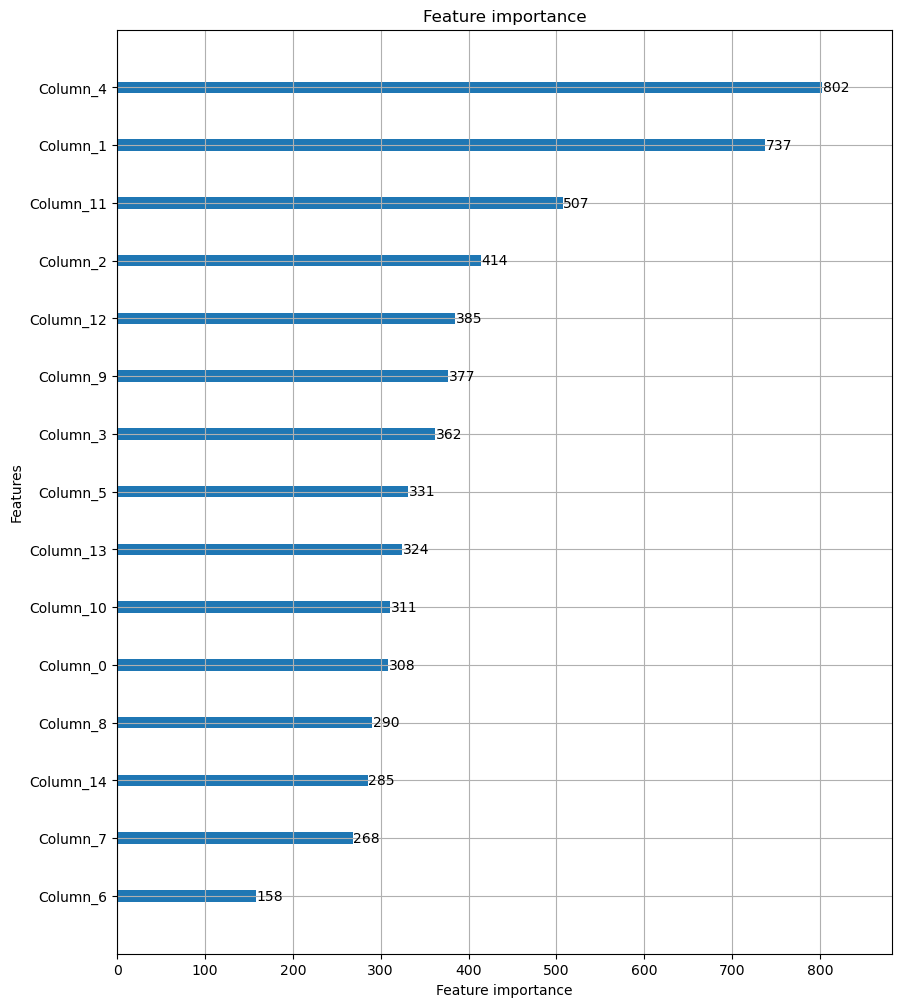

In [63]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax= plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper,ax=ax)